In [2]:
#C
import pandas as pd
import numpy as np
import seaborn as sns
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/mauri/Documents/Important IH Files/lab-customer-analysis-round-6/files_for_lab/csv_files/marketing_customer_analysis.csv')

In [4]:
len(list(df.head()))

24

In [5]:
Y = df['Total Claim Amount']
df = df.drop(['Total Claim Amount'], axis = 1)

In [6]:
Y

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: Total Claim Amount, Length: 9134, dtype: float64

In [7]:
len(list(df.head()))

23

In [8]:
df_num = df.select_dtypes(include = np.number)

In [9]:
df_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


In [10]:
transformer = Normalizer().fit(df_num)

In [11]:
df_normalized = transformer.transform(df_num)

In [12]:
df_normalized.shape

(9134, 7)

In [13]:
df_normalized

array([[4.90491254e-02, 9.98795451e-01, 1.22466656e-03, ...,
        8.87439538e-05, 0.00000000e+00, 1.77487908e-05],
       [9.99888829e-01, 0.00000000e+00, 1.34664469e-02, ...,
        6.01692310e-03, 0.00000000e+00, 1.14608059e-03],
       [2.55493903e-01, 9.66807936e-01, 2.14110479e-03, ...,
        7.53351684e-04, 0.00000000e+00, 3.96500886e-05],
       ...,
       [9.99934829e-01, 0.00000000e+00, 1.04110242e-02, ...,
        4.53185758e-03, 3.67447912e-04, 2.44965274e-04],
       [3.24391165e-01, 9.45912819e-01, 4.13871886e-03, ...,
        1.29334965e-04, 0.00000000e+00, 1.29334965e-04],
       [9.98972589e-01, 0.00000000e+00, 2.94508782e-02, ...,
        3.44231043e-02, 0.00000000e+00, 3.82478937e-04]])

In [14]:
df_fn = pd.DataFrame(df_normalized)

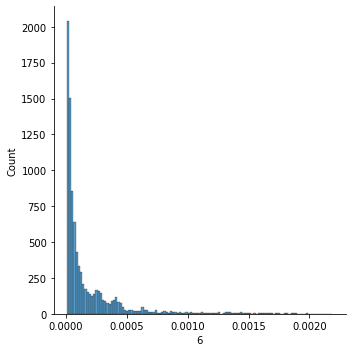

In [15]:
sns.displot(df_fn[6])

In [16]:
df_cate = df.select_dtypes(include = 'object')

In [17]:
print(list(df_cate.head()))

['Customer', 'State', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']


In [18]:
df_cate.drop(['Customer','Effective To Date'], inplace = True, axis =1)

In [19]:
encoder = OneHotEncoder(drop ='first').fit(df_cate)

encoded = encoder.transform(df_cate).toarray()
encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [20]:
X = np.concatenate((df_fn,encoded), axis=1)
# Right here, after you concat, turn X into a dataframe

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=100)

In [22]:
X_train.shape

(7307, 50)

In [23]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.125458,0.992090,0.003151,0.000384,0.002651,0.000000,0.000038,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.141346,0.989959,0.001186,0.000350,0.000762,0.000037,0.000025,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.417344,0.908726,0.005654,0.001929,0.002461,0.000000,0.000200,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.064648,0.997906,0.001610,0.000000,0.001113,0.000000,0.000015,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.540163,0.841543,0.004808,0.001442,0.001977,0.000000,0.000107,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,0.309761,0.950800,0.004230,0.000718,0.003073,0.000080,0.000120,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7303,0.688198,0.725520,0.002201,0.000000,0.000355,0.000012,0.000024,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7304,0.449079,0.893461,0.005878,0.002093,0.004026,0.000000,0.000322,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7305,0.173269,0.984860,0.004541,0.001316,0.002546,0.000000,0.000042,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
X.shape

(9134, 50)

In [25]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
r2 = r2_score(y_test,predictions)

In [26]:
r2

0.7629250694580023

In [27]:
mse = mean_squared_error(y_test,predictions)
mse

18883.535760808176

In [28]:
rmse = math.sqrt(mse)
rmse

137.417377943287

In [29]:
r2 = r2_score(y_test,predictions)
r2

0.7629250694580023

In [30]:
n = len(X_test) 
p = X_test.shape[1]

In [31]:
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

0.7562506626296803

In [32]:
X 

array([[0.04904913, 0.99879545, 0.00122467, ..., 1.        , 1.        ,
        0.        ],
       [0.99988883, 0.        , 0.01346645, ..., 0.        , 1.        ,
        0.        ],
       [0.2554939 , 0.96680794, 0.0021411 , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.99993483, 0.        , 0.01041102, ..., 0.        , 1.        ,
        0.        ],
       [0.32439117, 0.94591282, 0.00413872, ..., 0.        , 0.        ,
        0.        ],
       [0.99897259, 0.        , 0.02945088, ..., 1.        , 1.        ,
        0.        ]])

In [33]:
y_test

7175    312.000000
7255    131.262395
2846     65.659137
1211    666.724937
4294     60.151529
           ...    
6798    114.273025
5301    601.983113
8093    336.000000
5091    856.800000
530     259.060862
Name: Total Claim Amount, Length: 1827, dtype: float64

In [34]:
predictions

array([375.08784766, 308.20298972,   6.98160815, ..., 387.10166085,
       691.20298972, 208.94704334])